## Pemrosesan Citra Digital
## Tugas 4 - Edge Detection
### Nama : Muh. Ikhsan
### NIM  : H071191049

Pertama tama import semua package yang dibutuhkan dalam pengolahan citra yang akan dilakukan. 

In [1]:
#IMPORT PACKAGE
import numpy as np
import matplotlib.pyplot as plt
import imageio
import colorsys
import sys
import scipy.ndimage as nd
from PIL import Image
import mgcreate
import edge
import color

Persiapkan Fungsi-fungsi yang akan digunakan untuk konversi warna agar tidak perlu dideklarasikan lagi ketika akan digunakan secara berulang

In [2]:
#Color Converter
rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

##PROBLEMS

### 1. Buat gambar bernilai biner yang berisi *square anulus* (gunakan fungsi **SquareAnnulus** dengan nilai default dari modul *mgcreate* di perangkat lunak yang disediakan). Citra yang digunakan adalah $ a[\vec{x}] $ dan terapkan pengurangan berikut untuk mendapatkan versi citra *edge-enhanced*
,

$$\mathrm{\mathbf{b}}[\vec{x}] = 
\left|
\mathrm{\mathbf{a}}[\vec{x}] - D_{(1,1)}\mathrm{\mathbf{a}}[\vec{x}]
\right|
$$

####SOLUSI : 

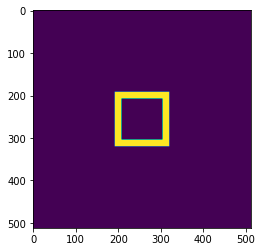

In [3]:
#Memuat Square Abylus
citra_1 = mgcreate.SquareAnnulus()
plt.imshow(citra_1)

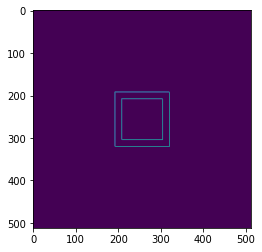

In [4]:
#Menerapkan Pengurangan Yang Diberikan
citra_1_d = nd.shift(citra_1,(1,1))
citra_1_bx = np.abs(citra_1 - citra_1_d)
plt.imshow(citra_1_bx)

### 2. Buat gambar bernilai biner yang berisi *square anulus* (gunakan fungsi **SquareAnnulus** dengan nilai default dari modul *mgcreate* di perangkat lunak yang disediakan). Citra yang digunakan adalah $ a[\vec{x}] $ dan terapkan pengurangan berikut untuk mendapatkan versi citra *edge-enhanced*

$$\mathrm{\mathbf{b}}[\vec{x}] = 
\mathrm{\mathbf{a}}[\vec{x}] - D_{(1,1)}\mathrm{\mathbf{a}}[\vec{x}]
$$

Perhatikan bahwa ini sedikit berbeda dari masalah sebelumnya karena nilai absolut tidak dihitung.

#### SOLUSI :

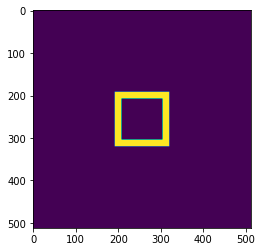

In [5]:
#Memuat Square Abylus
citra_2 = mgcreate.SquareAnnulus()
plt.imshow(citra_2)

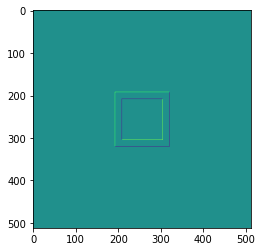

In [6]:
#Menerapkan Pengurangan Yang Diberikan
citra_2_d = nd.shift(citra_2,(1,1))
citra_2_bx = citra_2 - citra_2_d
plt.imshow(citra_2_bx)

### 3. Gunakan Citra $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$. Hitung persamaan berikut ini:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing \\
1 \\
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{d}}[\vec{x}] = 
\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathcal{L}_{RGB}\begin{Bmatrix}
\mathrm{\mathbf{c}}[\vec{x}] \\
\mathrm{\mathbf{d}}[\vec{x}] \\
1
\end{Bmatrix}
$$

$$
\mathrm{\mathbf{g}}[\vec{x}] = 
\mathrm{\mathbf{\alpha}}\mathrm{\mathbf{f}}[\vec{x}] +
(1 - \mathrm{\mathbf{\alpha}})\mathrm{\mathbf{b}}[\vec{x}]/\bigwedge \mathrm{\mathbf{b}}[\vec{x}]
$$


#### SOLUSI : 

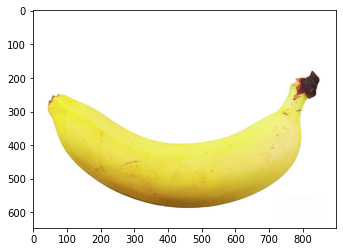

In [7]:
# Memuat Citra banana.jped
citra_3 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_3)

In [8]:
# Convert Citra ke HSV
citra_3_h, citra_3_s, citra_3_v = rgb_to_hsv(citra_3[...,0], citra_3[...,1], citra_3[...,2])


In [9]:
# Citra Yang Hanya Mengekstrak Channel v dan dilakukan edge Operator
citra_3_bx = edge.Sobel(citra_3_v)
# Citra Yang Hanya Mengekstrak Channel h
citra_3_cx = citra_3_h
# Citra Yang Hanya Mengekstrak Channel S
citra_3_dx = citra_3_s

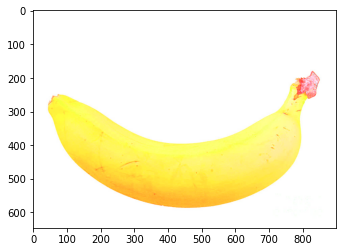

In [10]:
#Membuat Citra RGB dari HSV tetapi channel ke 3 
citra_3_r, citra_3_g, citra_3_b = hsv_to_rgb(citra_3_cx, citra_3_dx, np.full((citra_3.shape[0], citra_3.shape[1]), 1.0))
citra_3_fx = np.dstack((citra_3_r, citra_3_g, citra_3_b))
plt.imshow(citra_3_fx)

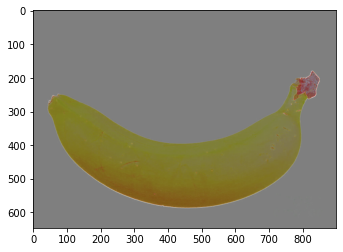

In [11]:
# Membuat Citra
alpha_3 = 0.5
citra_3_temp = ((1-alpha_3)*citra_3_bx)/citra_3_bx.max()
citra_3_gx = (alpha_3*citra_3_fx) + np.dstack((citra_3_temp,citra_3_temp,citra_3_temp))
plt.imshow(citra_3_gx)

### 4. Buat gambar bernilai biner yang berisi *square anulus* (gunakan fungsi **SquareAnnulus** dengan nilai default dari modul *mgcreate* di perangkat lunak yang disediakan). Citra yang digunakan adalah $ a[\vec{x}] $ dan terapkan pengurangan berikut untuk mendapatkan versi citra *edge-enhanced*

$$\mathrm{\mathbf{b}}[\vec{x}] = 
\left|
\mathrm{\mathbf{a}}[\vec{x}] - D_{(2,-2)}\mathrm{\mathbf{a}}[\vec{x}]
\right|
$$

#### SOLUSI :

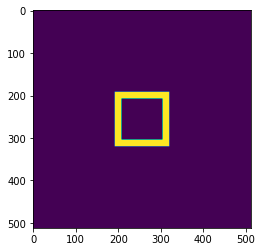

In [12]:
#Load Citra
citra_4 = mgcreate.SquareAnnulus()
plt.imshow(citra_4)

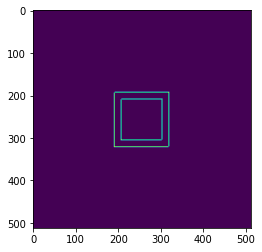

In [13]:
# Menerapkan Perintah yang Diberikan
citra_4_bx = np.abs(citra_4 - (nd.shift(citra_4,(2,-2))))
plt.imshow(citra_4_bx)

### 5.Tulis notasi operator yang menerima gambar abu-abu $ a[\vec{x}] $, dan kemudian buat versi citra dengan *smooth the edge-enhanced*

#### SOLUSI : 

Operator yang dapat digunakan untuk problem ini adalah

$$ 
\mathrm{\mathbf{b}}[\vec{x}] = 
\mathcal{S_{m}}E_{m}\mathcal{L}_{L}
\mathrm{\mathbf{a}}[\vec{x}]
$$


Implementasi Operator dalam Program

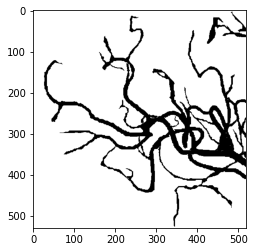

In [14]:
#Memuat Citra Abu-abu
citra_5 = imageio.imread('smother.png', as_gray=True)
plt.imshow(citra_5, cmap="gray")

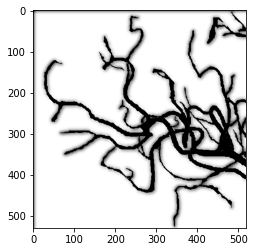

In [15]:
#Melakukan operasi mendapatkan edge
citra_5_d = abs(citra_5 - nd.shift(citra_5,(1,1),order=0))

#Melakukan smooth terhadap edge
citra_5_fil = nd.gaussian_filter(citra_5_d+0.0,4)
citra_5_mask = 1 - citra_5_fil/citra_5_fil.max()
#Mengalikan hasil smooth dengan citra awal
citra_5_output = citra_5*citra_5_mask
plt.imshow(citra_5_output, cmap="gray")

### 6. Ginakan $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$, dan  terapkan algoritma *Sobel edge enhancement* untuk perhitungan berikut ini:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing \\
\end{Bmatrix}
\mathcal{L}_{RGB}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{RGB}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{d}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing\\
1
\end{Bmatrix}
\mathcal{L}_{RGB}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathrm{\mathbf{b}}[\vec{x}] +
\mathrm{\mathbf{c}}[\vec{x}] +
\mathrm{\mathbf{d}}[\vec{x}]
$$

#### SOLUSI :

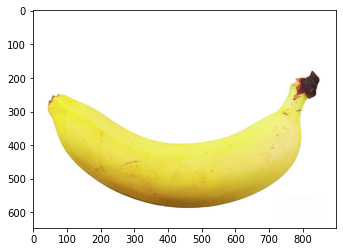

In [16]:
citra_6 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_6)

In [17]:
# Buat 3 Citra Baru Dengan Hasil Ekstrak Tiap Channel
# Citra Channel red
citra_6_r = citra_6[...,0]
# Citra Channel Green
citra_6_g = citra_6[...,1]
# Citra Channel Blue
citra_6_b = citra_6[...,2]

In [18]:
# Lakukan Edge Sobel Filter ke Tiap Citra 
citra_6_bx = edge.Sobel(citra_6_r)
citra_6_cx = edge.Sobel(citra_6_g)
citra_6_dx = edge.Sobel(citra_6_b)

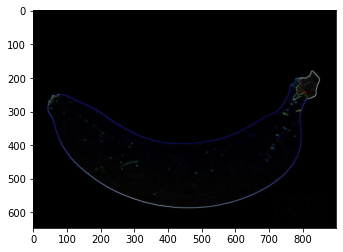

In [19]:
# Buat Citra Baru Dengan Menggabungkan tiap Channel
citra_6_fx = np.dstack((citra_6_bx, citra_6_cx, citra_6_dx))
# Normalize Citra
citra_6_fx = citra_6_fx/citra_6_fx.max()
plt.imshow(citra_6_fx)

### 7.Misalkan  $b[\vec{x}] = E_{m}{a}[\vec{x}]$, dimana $ m $ menggunakan fungsi **DerivEdge**. Argumen kedua untuk fungsi ini adalah $ (k,k) $, dimana $ k $ adalah jumlah pergeseran yang sama di kedua dimensi. Nilai $ k $ yang mana yang menghasilkan nilai piksel maksimum di $ \mathrm{\mathbf{b}}[\vec{x}] $? Mengapa?

#### SOLUSI :

Nilai $\mathrm{\mathbf{b}}[\vec{x}]$ akan memiliki nilai piksel maksimum ketika $k \ge min(Za[\vec{x}])$ atau  $k \le -min(Za[\vec{x}])$ hal ini dikarenakan saat keadaan ini terjadi maka ketika pergeseran dilakukan oleh fungsi **DerivEdge** maka tidak pengurangan terhadap citra awal, sehingga maxmium piksel dari citra yang dihasilkan akan tetap sama dengan citra awal.


untuk implementasinya dapat dilihat pada contoh berikut

In [20]:
# Load Citra
citra_7 = mgcreate.Checkerboard()
# Minimum DImensi
minDimension = min(np.array(citra_7.shape))
minDimension


512

In [21]:
#Nilai Piksel Maksimum Dari Citra
citra_7.sum()

131072.0

In [22]:
# Perbandingan Perubahan Nilai Piksel
# Ketika k = 1
print('k=1 : ',edge.DerivEdge(citra_7,(1,1)).sum())
#Ketika k = 511
print('\nk=511 : ', edge.DerivEdge(citra_7,(511,511)).sum())
# Ketika k = 512
print('\nk=512 : ',edge.DerivEdge(citra_7,(512,512)).sum())
#Ketika k = -600
print('\nk=-600 : ', edge.DerivEdge(citra_7,(-600,-600)).sum())


k=1 :  15391.0

k=511 :  131071.0

k=512 :  131072.0

k=-600 :  131072.0


Dapat dilihat bahwa saat k=1 nilai pikselnya itu jauh dari maksimum piksel atau nilai piksel citra awal. Pada saat k=511 nilai piksel mendekati maksimum tetapi masih lebih kecil dari piksel maksimum. Nah saat citra $k=512 \ge min(Za[\vec{x}])$ dan saat $k=-600 \le -min(Za[\vec{x}])$ maka nilai piksel dari citranya akan maksimum atau sama dengan citra awal sebelum di shift


Jadi Semua Nilai $k$ yang memenuhi adalah $k\ge min(Za[\vec{x}])$ dan $k\le min(Za[\vec{x}])$

### 8. Gunakan fungsi **Checkerboard** yang telah diseiakan modul *mgcreate* to untuk membuat *checkerboard pattern* $\mathrm{\mathbf{a}}[\vec{x}]$.  Gunakan fungsi **DerivEdge**,  hitung *edge-enhanced*  dari citra $\mathrm{\mathbf{b}}[\vec{x}] = E_{m}\mathrm{\mathbf{a}}[\vec{x}]$ dengan *shift* dari $(1,1)$. Ulangi percobaan yang sama dengan *shift* dari $(32,32)$. Jelaskan kenapa outputnya berbeda.

#### SOLUSI :

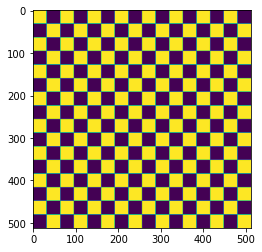

In [23]:
citra_8 = mgcreate.Checkerboard()
plt.imshow(citra_8)

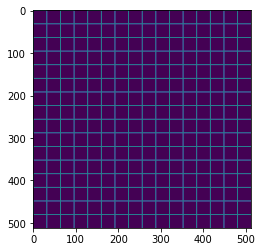

In [24]:
citra_8_bx = edge.DerivEdge(citra_8, (1,1))
plt.imshow(citra_8_bx)

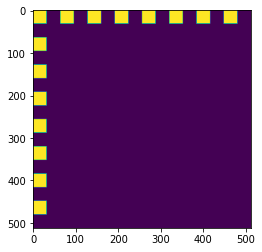

In [25]:
citra_8_bx = edge.DerivEdge(citra_8, (32,32))
plt.imshow(citra_8_bx)

Fungsi DerivEdge Diketahui seperti berikut

```
def DerivEdge( indata, dvh ):
  b = nd.shift( indata + 0.0, dvh, order=0, cval=0 ) 
  answ = abs(indata - b)
  return answ
```


Dapat Dilihat bahwa DerivEdge Melakukan shif terhadap citra kemudian mengembalikan selesihnya dengan citra awal.
Dari sini kita bisa menelaah dengan jelas bahwa jika shiftnya berbeda tentu citra yang dikembalikan juga berbeda

Output dari kedua proses ini berbeda karena pada proses pertama dilakukan deriveedge dengan pergeseran $(1,1)$ artinya citranya bergerak 1 piksel pada sumbu x, dan, 1 piksel pula pada sumbu y, sehingga selisih dengan citra awal tidak terlalu jauh yang menyebabkan outputnya dapat menunjukkan tepi dengan jelas. Sedangkan proses kedua dilakukan deriveedge dengan pergeseran $(32,32)$ bergerak 32 piksel pada sumbu x, dan 32 piksel pada sumbu y yang mana peregeseran ini lebih besar dari ukuran kotak itu sendiri maka selisih dari citra tidak akan menunjukkan tepi citra lagi, tapi malah menghilangkan sebagian piksel dari citra. 

### 9. Diberikan citra inputan $\mathbf{a}[\vec{x}]$ dari fungsi Homeplate di modul mgcreate. Hitung $\mathbf{b}[\vec{x}]$ dengan

$$\mathrm{\mathbf{b}}[\vec{x}] = E_{m}\mathrm{\mathbf{a}}[\vec{x}]$$ dimana $m$ adalah algoritma *Sobel edge enhancement*. Buat citra $\mathrm{\mathbf{c}}[\vec{x}]$ dengan,$$\mathrm{\mathbf{c}}[\vec{x}] = \Gamma_{5.5}\mathrm{\mathbf{b}}[\vec{x}]$$


#### Solusi :

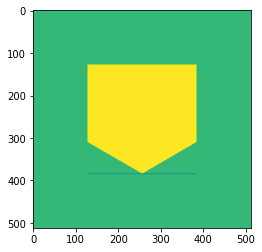

In [26]:
#Memuat Citra
citra_9 = mgcreate.Homeplate().astype('float64')
plt.imshow(citra_9)

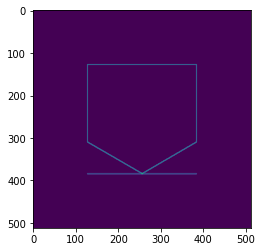

In [27]:
#Lakukan sobel filter terhadap citra
citra_9_bx = edge.Sobel(citra_9)
plt.imshow(citra_9_bx)

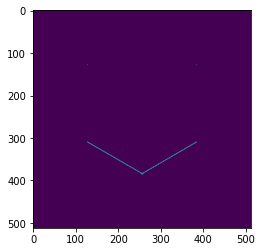

In [28]:
# Lakukan thresshold dengan hanya mengambil value yang > 5.5
citra_9_cx = (citra_9_bx > 5.5)
plt.imshow(citra_9_cx)

### 10. Gunakan citra $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$. Lakukan perhitungan berikut:

$$
\begin{array}{c}
\mathbf{b}[\vec{x}]=E_{m}\left\{\begin{array}{l}
1 \\
\emptyset \\
\varnothing
\end{array}\right\} \mathcal{L}_{Y U V} \mathbf{a}[\vec{x}] \\
\mathbf{c}[\vec{x}]=E_{m}\left\{\begin{array}{l}
\emptyset \\
1 \\
\emptyset
\end{array}\right\} \mathcal{L}_{Y U V} \mathbf{a}[\vec{x}] \\
\mathbf{d}[\vec{x}]=E_{m}\left\{\begin{array}{l}
\emptyset \\
\emptyset \\
1
\end{array}\right\} \mathcal{L}_{Y U V} \mathbf{a}[\vec{x}] \\
\mathbf{f}[\vec{x}]=\mathbf{b}[\vec{x}]+\mathbf{c}[\vec{x}]+\mathbf{d}[\vec{x}]
\end{array}
$$

#### Solusi :

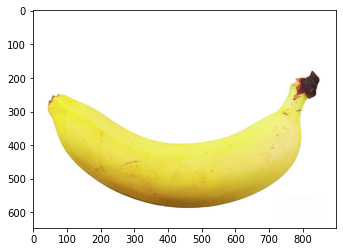

In [29]:
# Memuat Citra
citra_10 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_10)

In [30]:
#Merubah warna Citra Ke YUV
citra_10_r, citra_10_g, citra_10_b = citra_10[...,0], citra_10[...,1], citra_10[...,2]
citra_10_y, citra_10_u, citra_10_v = color.RGB2YUV(citra_10_r, citra_10_g, citra_10_b)

In [31]:
#Lakukan Sobel Filter ke Semua Citra
citra_10_bx = edge.Sobel(citra_10_y)
citra_10_cx = edge.Sobel(citra_10_u)
citra_10_dx = edge.Sobel(citra_10_v)

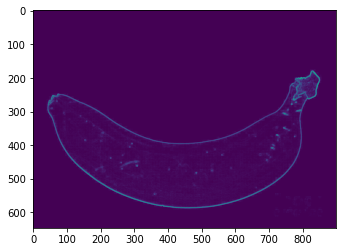

In [32]:
#Buat Citra baru yang menjumlahkan citra sebelumnya
citra_10_fx = citra_10_bx + citra_10_cx + citra_10_dx
#Normalize
citra_10_fx /= citra_10_fx.max()
plt.imshow(citra_10_fx)

### 11. Gunakan $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$. Lakukan perhitungan berdasarkan:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing \\
1 \\
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{d}}[\vec{x}] = 
\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathcal{L}_{RGB}\begin{Bmatrix}
\mathrm{\mathbf{c}}[\vec{x}] \\
\mathrm{\mathbf{d}}[\vec{x}] \\
\varnothing
\end{Bmatrix}
$$

$$
\mathrm{\mathbf{g}}[\vec{x}] = 
\mathrm{\mathbf{\alpha}}\mathrm{\mathbf{f}}[\vec{x}] +
(1 - \mathrm{\mathbf{\alpha}})\mathrm{\mathbf{b}}[\vec{x}]
$$


#### Solusi :

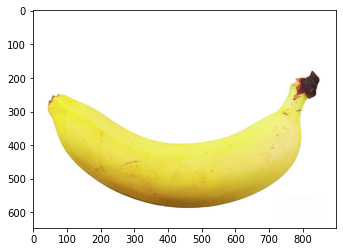

In [33]:
#Load Citra
citra_11 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_11)

In [34]:
#Ubah Citra ke HSV
citra_11_h, citra_11_s, citra_11_v = rgb_to_hsv(citra_11[...,0], citra_11[...,1], citra_11[...,2])

In [35]:
#Lakukan Filter Sobel Ke Citra Channel v
citra_11_bx = edge.Sobel(citra_11_v)
#
citra_11_cx, citra_11_dx = citra_11_h, citra_11_s

In [36]:
#Ubah Kembali Citra Ke RGB tapi mengisi channel b dengan himpunan kosong
citra_11_r, citra_11_g, citra_11_b = hsv_to_rgb(citra_11_cx, citra_11_dx, np.zeros((citra_11.shape[0], citra_11.shape[1])))

In [37]:
#Buat Citra Dari channel rgb baru
citra_11_fx = np.dstack((citra_11_r, citra_11_g, citra_11_b))

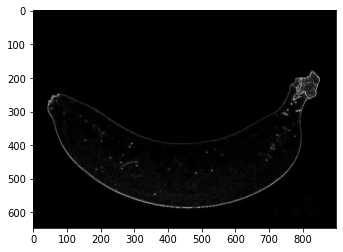

In [38]:
# Lakukan operasi gx untuk mendapatkan citra hasil
alpha_11 = 0.5
citra_11_temp = ((1-alpha_11)*citra_11_bx)
citra_11_gx = (alpha_11* citra_11_fx) + np.dstack( ( citra_11_temp, citra_11_temp, citra_11_temp ) )

plt.imshow((citra_11_gx* 255).astype(np.uint8))

### 12. Gunakan citra $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$, dan terapkan algoritma *Sobel edge enhancement* untuk melakukan perhitungan berikut:

$$ 
\mathrm{\mathbf{b}}[\vec{x}] = 
\mathrm{\mathbf{a}}[\vec{x}]-
E_{m}\mathcal{L}_{L}
\mathrm{\mathbf{a}}[\vec{x}]
$$

#### Solusi

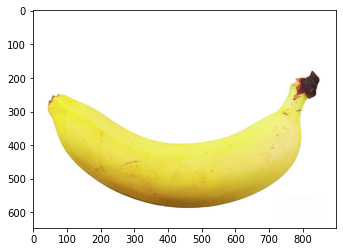

In [39]:
#Memuat Citra
citra_12 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_12)

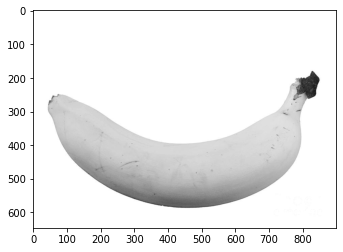

In [40]:
#Merubah Citra Jadi Abu-Abu
citra_12_gray = 0.5 *citra_12[:,:,0] + 0.75*citra_12[:,:,1] + 0.25*citra_12[:,:,2]
plt.imshow(citra_12_gray, cmap="gray")

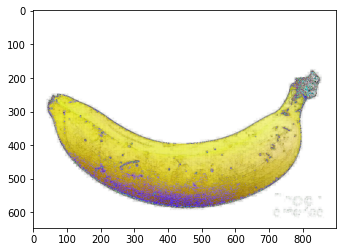

In [41]:
# Melakukan filter dengan fungsi sobel 
citra_12_temp = edge.Sobel(citra_12_gray)
citra_12_bx = citra_12 -(np.dstack((citra_12_temp, citra_12_temp, citra_12_temp)))

plt.imshow((citra_12_bx * 255).astype(np.uint8))